1. Membaca dan Menampilkan Gambar

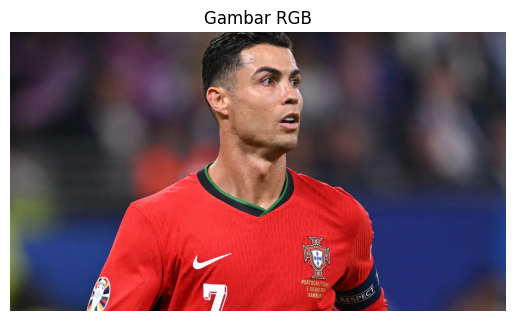

In [13]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar dari path tertentu
img = cv2.imread('/content/CristianoRonaldo.jpg')

# Konversi gambar ke format RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar menggunakan matplotlib
plt.imshow(img_rgb)
plt.title("Gambar RGB")
plt.axis('off')
plt.show()

# Umar Al Faruq - 22312115

2. Oprasi Smooting dan Sharpening

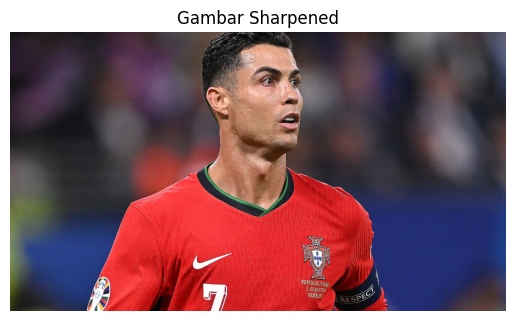

In [2]:
import numpy as np

# Terapkan Gaussian Blur pada gambar
blurred = cv2.GaussianBlur(img, (5, 5), 0)  # Ukuran kernel 5x5

# Buat kernel sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Kernel sharpening 3x3

sharpened = cv2.filter2D(img, -1, kernel)

# Tampilkan gambar hasil
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Gambar Sharpened")
plt.axis('off')
plt.show()

# Umar Al Faruq - 22312115

3. Transformasi Affine

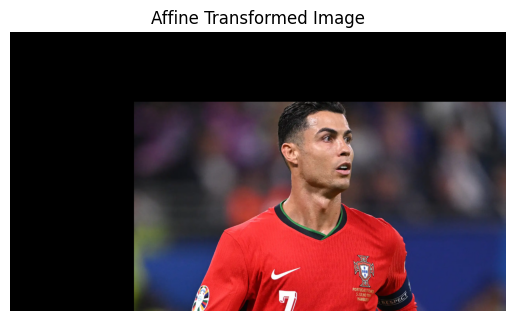

In [3]:
rows, cols = img.shape[:2]

# Titik kontrol untuk transformasi affine
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols // 4, rows // 4], [cols - 1, rows // 4 ], [cols // 4, rows - 1]])  # Lengkapi Titik transformasi

# Buat matriks transformasi dan lakukan transformasi
matrix = cv2.getAffineTransform(pts1, pts2)
affine_transformed = cv2.warpAffine(img, matrix, (cols, rows))

# Tampilkan hasil transformasi
plt.imshow(cv2.cvtColor(affine_transformed, cv2.COLOR_BGR2RGB))
plt.title("Affine Transformed Image")
plt.axis('off')
plt.show()

# Umar Al Faruq - 22312115

4. Deteksi Tepi

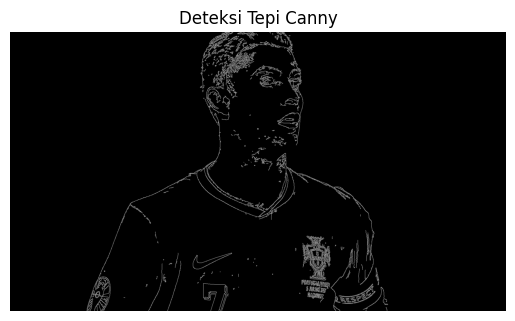

In [15]:
# Ubah citra menjadi grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Terapkan deteksi tepi Canny
edges_canny = cv2.Canny(img_gray, 90, 240)  # Isi nilai threshold

# Tampilkan hasil deteksi tepi
plt.imshow(edges_canny, cmap='gray')
plt.title("Deteksi Tepi Canny")
plt.axis('off')
plt.show()

# Umar Al Faruq - 22312115

5. Deblurring

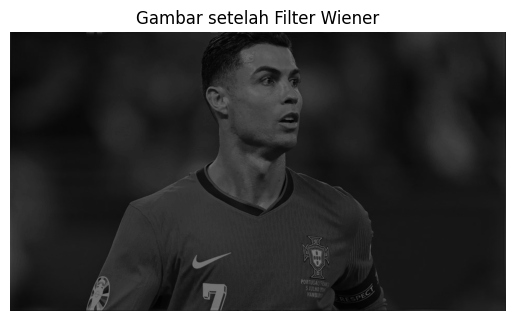

In [22]:
import scipy.signal

# Buat simulasi kernel blur dan terapkan pada gambar
kernel = np.ones((5, 5)) / 25  # Tentukan Ukuran kernel : 5x5, dinormalisasi
blurred = cv2.filter2D(img_gray, -1, kernel)

# Fungsi filter Wiener
def wiener_filter(blurred, kernel, K=0.01):
    dummy = np.copy(blurred)
    dummy = np.fft.fft2(dummy)
    kernel = np.fft.fft2(kernel, s=blurred.shape)
    kernel = np.conj(kernel) / (np.abs(kernel)**2 + K)
    dummy = dummy * kernel
    deconvolved = np.abs(np.fft.ifft2(dummy))
    return deconvolved

# Terapkan filter Wiener dan tampilkan hasil
restored_image = wiener_filter(blurred, kernel)
plt.imshow(restored_image, cmap='gray')
plt.title("Gambar setelah Filter Wiener")
plt.axis('off')
plt.show()

# Umar Al Faruq - 22312115